In [1]:
!pip install pydae --quiet
!pip install photovoltaic-modeling-python --quiet 
!wget -q https://raw.githubusercontent.com/pydae/pydae/master/src/pydae/edashboards/pvs/pv_dashboard.svg
!wget -q https://raw.githubusercontent.com/pydae/pydae/master/src/pydae/edashboards/pv_model/pv_model_db.svg

'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.


## Model parameters obtaining

In [2]:
from photovoltaic_modeling.parameter.parameter_extraction import ParameterExtraction

# http://www.posharp.com/msx120-solar-panel-from-bp-solar_p857364851d.aspx

# from manufacturer
I_sc = 3.87 # short circuit current
I_mpp = 3.56 # maximum power point current
V_mpp = 33.7 # maximum power point voltage
V_oc = 42.1  # open circuit voltage
N_s = 72 # number of cells in series
P_mpp = 120 
K_vt = -0.38 # Temperature Coefficient of V_oc %/Cº
K_it = 0.065  # Temperature Coefficient of I_sc %/Cº     

parameter_extraction = ParameterExtraction(I_sc, V_oc, I_mpp, V_mpp, number_of_cells_in_series = N_s)
initial_guess = [1,1000,1*72/N_s] # [series_resistance_estimate,shunt_resistance_estimate,diode_quality_factor_estimate]
parameter_extraction.calculate(initial_guess) 

R_s  = parameter_extraction.series_resistance
R_sh = parameter_extraction.shunt_resistance
K_d  = parameter_extraction.diode_quality_factor

print(f'R_s = {R_s:0.3f} Ω, R_sh = {R_sh:0.1f} Ω, K_d = {K_d:0.4f}')

R_s = 0.560 Ω, R_sh = 1862.1 Ω, K_d = 1.3433


## PV module model

system without dynamic equations, adding dummy dynamic equation


<Figure size 640x480 with 0 Axes>

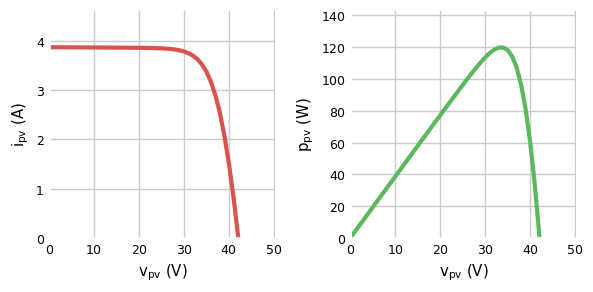

In [3]:
from pydae.edashboards.pv_model.pv_model_module import dashboard as db_pv
db1 = db_pv()
db1.data = {'I_sc':I_sc,'V_oc':V_oc,'I_mpp':I_mpp,'V_mpp':V_mpp,'N_s':N_s,'K_vt':K_vt,'K_it':K_it,'R_pv_s':R_s,'R_pv_sh':R_sh,'K_d':K_d}
db1.build()
db1.ini()
db1.widgets();
db1.show();


## PV generator dashboard

In [4]:
from pydae.edashboards.pvs.pv_mid_module import dashboard

db = dashboard()
db.build()

In [5]:
db = dashboard()

db.params.update({'I_sc_1': I_sc, 'V_oc_1': V_oc, 'I_mpp_1': I_mpp, 'V_mpp_1': V_mpp,
                  'N_s_1': N_s, 'K_vt_1': K_vt,  'K_it_1':K_it,'R_pv_s_1':R_s, 'R_pv_sh_1': R_sh,'K_d_1':K_d,
                  'N_mp_1':320,'N_ms_1':25, "p_ppc_ref_1":2.0})
db.ini()

db.widgets()
db.show()

Maximum number of iterations (max_it = 50) reached without convergence.


[BP Solar MSX120 Solar](http://www.posharp.com/msx120-solar-panel-from-bp-solar_p857364851d.aspx)

In [6]:
db.params.update({'I_sc_1': I_sc, 'V_oc_1': V_oc, 'I_mpp_1': I_mpp, 'V_mpp_1': V_mpp,
                  'N_s_1': N_s, 'K_vt_1': K_vt,  'K_it_1':K_it,'R_pv_s_1':R_s, 'R_pv_sh_1': R_sh,'K_d_1':K_d,
                  'N_mp_1':200,'N_ms_1':20,'b_1_2':-0.01})
db.model.ini({})
db.model.report_params()

S_base =100000000.00
g_1_2 = 0.00
b_1_2 =-0.10
bs_1_2 =-0.00
U_1_n =20000.00
U_2_n =20000.00
S_n_2 =100000000.00
F_n_2 =50.00
X_v_2 = 0.00
R_v_2 = 0.00
K_delta_2 = 0.00
K_alpha_2 = 0.00
K_rocov_2 = 0.00
S_n_1 =1000000.00
N_ms_1 =25.00
N_mp_1 =320.00
I_sc_1 = 3.87
I_mpp_1 = 3.56
V_mpp_1 =33.70
V_oc_1 =42.10
N_s_1 =72.00
K_vt_1 =-0.38
K_it_1 = 0.07
R_pv_s_1 = 0.56
R_pv_sh_1 =1862.13
K_d_1 = 1.34
K_pdc_1 =100.00
R_s_1 = 0.01
X_s_1 = 0.05
C_dc_1 =10.50
A_l_1 = 0.01
B_l_1 = 0.01
C_l_1 = 0.01
K_p_agc = 0.00
K_i_agc = 0.00
K_xif = 0.01
